Upload lab_data.csv file to Google Colab Workspace



In [39]:
# You can place imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import csv dataset using pandas library. Wite it to *data_df* Dataframe object

In [40]:
data_df = pd.read_csv('/content/lab_data (1).csv')

Display first 10 rows of data_df

In [41]:
print(data_df.head(10))


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    4/9/2012       58       635  ...                  7           

Create 4 pandas DataFrame objects consisting of given columns:

*   people_df ('ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain')
*   product_df ('ID','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldPods')
*   promotions_df ('ID','NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response')
*   place_df ('ID','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth')





In [42]:
people_df = pd.DataFrame(data_df.loc[:,['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']])

product_df = pd.DataFrame(data_df.loc[:,['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])

promotions_df = pd.DataFrame(data_df.loc[:,['ID', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']])

place_df = pd.DataFrame(data_df.loc[:,['ID', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])


Display count of unique values from Marital_Status column (people_df DataFrame)

In [43]:
# Check value_counts() function
print(people_df['Marital_Status'].value_counts())



Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


Modify values Maritial_Status column (in people_df DataFrame). 

> Replace 'Married', 'Together' with 'Relationship'


> Replace 'Single', 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' with 'Single'





In [44]:
people_df['Marital_Status'].replace(['Married', 'Together'], 'Relationship', inplace=True)

people_df['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single', inplace=True)


Create new column named 'Kids' with a value of sum Teenhome and Kidhome (in people_df DataFrame)

In [45]:
people_df['Kids'] = people_df['Teenhome'] + people_df['Kidhome']

Create new column 'Age'. Calculate values in this column using column 'Year_Birth'

In [46]:
people_df['Age']= 2023 - people_df['Year_Birth']

Rename column name Recency to Last_Purchase in people_df DataFrame

In [47]:
people_df = people_df.rename(columns={'Recency': 'Last_Purchase'})
print(people_df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Last_Purchase', 'Complain', 'Kids', 'Age'],
      dtype='object')


Create new Dataframe people_new from processed people_df. Include columns 'ID', 'Education', 'Marital_Status', 'Income', 'Last_Purchase', 'Complain', 'Kids', 'Age'

In [48]:
people_new = people_df[['ID', 'Education', 'Marital_Status', 'Income', 'Last_Purchase', 'Complain', 'Kids', 'Age']]

Create a new DataFrame named education_counts which contains the number of occurrences of each unique value in the Education column from DataFrame people_new

In [49]:
education_counts = people_new[['Education']].value_counts()
print(education_counts)

Education 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
dtype: int64


Create a new DataFrame named mean_income which contains the mean income for each unique value in the Education column from DataFrame people_new

In [50]:
mean_income = people_new.groupby('Education')['Income'].mean().reset_index()
mean_income.columns=['Education', 'mean_Income']
print(mean_income)


    Education   mean_Income
0    2n Cycle  47633.190000
1       Basic  20306.259259
2  Graduation  52720.373656
3      Master  52917.534247
4         PhD  56145.313929


Merge education_counts and mean_income basing on Education column into one dataframe named education_desc

In [51]:
education_desc = education_counts.to_frame().merge(mean_income, on='Education')

Create a countplot showing relationship between the occurrence(counts) of people for each Marital_status grouped by Education

<Axes: xlabel='Marital_Status', ylabel='count'>

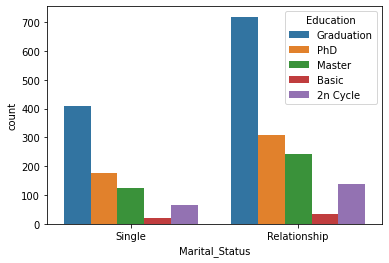

In [52]:
sns.countplot(x='Marital_Status', hue='Education', data=people_df)


Create a barplot showing the relationship between a people's mean age and Marital_Status

<Axes: xlabel='Marital_Status', ylabel='Age'>

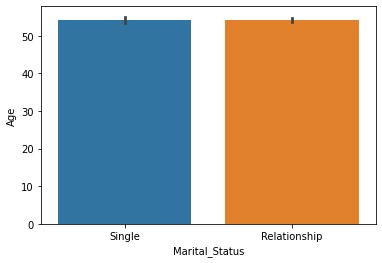

In [53]:
sns.barplot(x='Marital_Status', y='Age', data=people_df, estimator=np.mean)

Create a scatterplot showing the relationship between Age and mean income in specified Age (Mean Income = f(Age)) 


<Axes: xlabel='Age', ylabel='Income'>

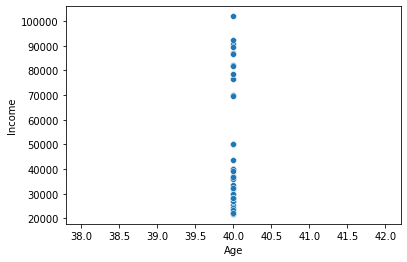

In [54]:
age_subset = people_df[people_df['Age'] == 40]
sns.scatterplot(x='Age', y='Income', data=age_subset)